### Inverse Square root

Here we suggest slightly modifed (simplified) version of Onverse Square Root algorithm from [this paper](https://arxiv.org/pdf/1805.12445) (see Appendix C).

Exactly this algorithm is implemented in [inv_sqrt.py](../../qmath/func/inv_sqrt.py).

##### Algorithm

* Initialization: $x_0 = 2^{\lfloor -\frac{\lfloor log_2 (a) \rfloor}{2} \rfloor}.$
* Newton-Raphson iteration: 
  * $x_1 = x_0 (C_0 - \frac{a x_0^2}{2})$, where $C_0 = 1.615$; 
  * $x_{n+1} = x_n (1.5 - \frac{a x_n^2}{2})$ for $n \ge 1$.
* Then $\frac{1}{\sqrt{a}} \approx x_m$ where $m$ is number of iterations.

##### Differences from original algorithm in the paper
* Slightly different formula for $x_0$.
* No special computation for $x_1$. Instead of using optimized algorithm leveraging the fact that $x_0$ is power of 2, 
as proposed in the paper, we use the regular Newton-Raphson iteration. But we do use different constant $C_0$.
* Value of constant $C_0$ for first iteration is set to 1.615 and does not depend on input. See notebook below for choice of this parameter.

These changes were done to simplify implementation. 

### Implementation


In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt

def initial_guess(a):
    return 2**(-(int(math.floor(math.log2(a))))//2)
    
def iteration(xn, a, c=1.5):
    return xn*(c - 0.5*a*(xn**2))

def inv_square(a, iters=1, c0=None):
    c0 = c0 or 1.615
    x = initial_guess(a)        
    for i in range(iters):
        c = 1.5 if i>0 else c0
        x = iteration(x, a,c=c)
    return x


### Experiments

Below, we run this algorithms for inputs in range $[10^{-3}, 10^3]$ for $m$ (number of iterations) between 2 and 7, and look
at accuracy. 

We define accuracy as $\max_{a} |a \cdot x_m - \sqrt{a}|$, as in the paper.

m=2, max_diff=0.6334574347585225
m=3, max_diff=0.018906734538500558
m=4, max_diff=1.6952656057611648e-05
m=5, max_diff=1.722710862850363e-11
m=6, max_diff=7.105427357601002e-15


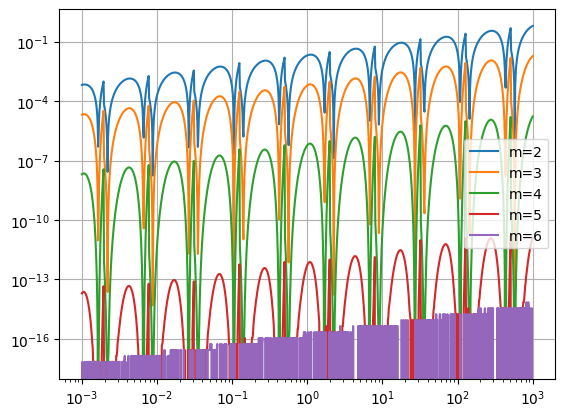

In [ ]:
def compute_diffs(a_range, iters=1, c0=None):
    results = np.array([inv_square(a, iters=iters, c0=c0) for a in a_range])
    return np.abs(a_range*results - np.sqrt(a_range))

a_range = 10**np.linspace(-3, 3, 1000)

for iters in range(2, 7):
    diffs = compute_diffs(a_range, iters=iters)
    print(f"m={iters}, max_diff={np.max(diffs)}")
    plt.plot(a_range, diffs, label = f"m={iters}")
plt.xscale('log')
plt.yscale('log')
plt.xscale('Argument')
plt.yscale('Accuracy')
plt.legend()
plt.grid()

Below, we reproduce Figure 6 from the paper, but with our classical algorithm.
Note that in the paper they dont' count first iteration as "Newton iteration", so 
out number of iterations is 1 more.

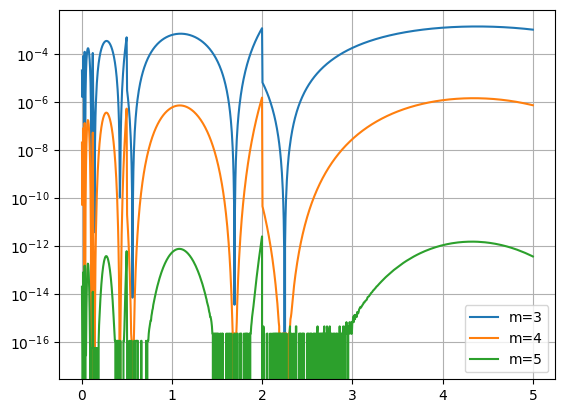

In [ ]:
a_range = np.linspace(1e-3, 5, 1000)
for iters in [3,4,5]:
    plt.plot(a_range, compute_diffs(a_range, iters=iters), label=f"m={iters}")
plt.yscale('log')
plt.xscale('Argument')
plt.yscale('Accuracy')
plt.legend()
plt.grid()

Below we show fitting constant $C_0$ for different $m$. We see that picking value
close to 1.615 is significantly better than 1.5. While we could pick different value
for different values of $m$, the difference in accuracy around $C_0=1.615$ is 
so insignificant that we are using $C_0=1.615$ for all $m$.

m=2, minimum diff at c0=1.6084, 0.561529766096097
m=3, minimum diff at c0=1.6124, 0.017443341953473634
m=4, minimum diff at c0=1.6148, 1.6714372680581846e-05
m=5, minimum diff at c0=1.6156, 1.545785721646098e-11
m=6, minimum diff at c0=1.538, 3.552713678800501e-15


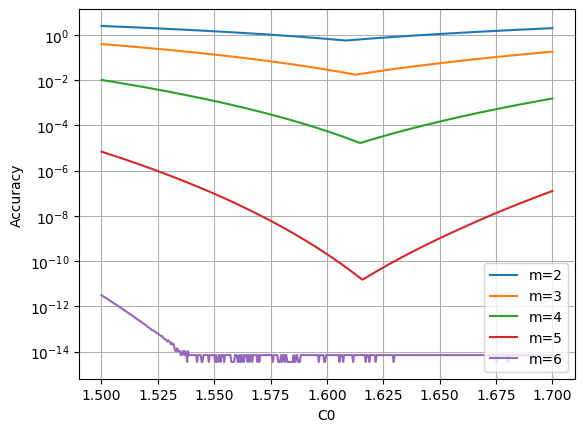

In [ ]:
a_range = 10**np.linspace(-3, 3, 1000)
c0_range = np.linspace(1.5, 1.7, 501)

def compute_max_diff_for_c0(c0, iters=3):
    return np.max(compute_diffs(a_range, iters=iters, c0=c0))

for iters in [2,3,4,5,6]:
    md = np.array([compute_max_diff_for_c0(c0, iters=iters) for c0 in c0_range])
    c0=c0_range[np.argmin(md)]
    print(f"m={iters}, minimum diff at c0={c0}, {np.min(md)}")
    plt.plot(c0_range, md, label=f"m={iters}")
plt.yscale('log')
plt.legend(loc='lower right')
plt.xlabel("C0")
plt.ylabel("Accuracy")
plt.grid()
